# Plotting Airport Zurich
Using the data to plott airport Zurich

## Importing
Importing libraries. Setting `%matplotlib inline` to plott the graph inside the notebook

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import shapely
from shapely.geometry import Point, Polygon, LineString
import fiona
import os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

Importing CSV

In [ ]:
df = pd.read_csv('../data_generated/20180521_sampled.csv')
df.drop(columns='geometry', inplace=True)
#df = pd.read_csv('../data_generated/20180521.csv')

## Plotting Airport Zurich
Transforming Data to a GeoDataFrame

In [3]:
#Groundspeed must be > 0
#df = df[df.ground_speed.notna()]
#df = df[df.onground == False]
#df = df[df.altitude < 8000]

#len(df)

In [4]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geo_df = geopandas.GeoDataFrame(df, geometry=geometry)

In [9]:
# Airport Zurich
coords = [( 8.4994, 47.4863 ), ( 8.4994, 47.4283 ), ( 8.619, 47.4283 ), ( 8.619, 47.4863 ), ( 8.4994, 47.4863 )]

# Lucerne
#coords = [ [ 8.226, 47.0979 ], [ 8.226, 47.0141 ], [ 8.3789, 47.0141 ], [ 8.3789, 47.0979 ], [ 8.226, 47.0979 ] ]

# Emmen
#coords = [ [ 8.2694, 47.1154 ], [ 8.2694, 47.0672 ], [ 8.3567, 47.0672 ], [ 8.3567, 47.1154 ], [ 8.2694, 47.1154 ] ] 

# Schweiz
#coords = [ [ 5.3029, 48.4777 ], [ 5.3029, 45.3264 ], [ 11.8072, 45.3264 ], [ 11.8072, 48.4777 ], [ 5.3029, 48.4777 ] ]

zurich_airport = Polygon(coords)

In [10]:
#Take Zurich
df_zurich = geo_df[geo_df.geometry.within(zurich_airport)]

#Transform the points into LineStrings by grouping the df
df_grouped = df_zurich.groupby('icao24', as_index=False).agg({'timestamp': 'count', 'geometry': lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist()})

#Only lines
df_grouped = df_grouped[df_grouped.timestamp > 1]

In [11]:
#Transform to geoDataFrame
gdf_zurich = geopandas.GeoDataFrame(df_grouped, crs={'init': 'epsg:4326'})

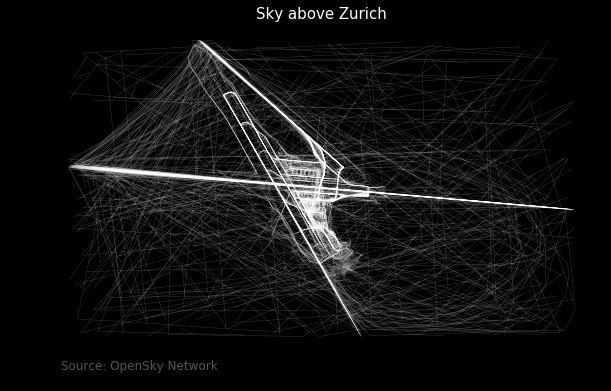

In [12]:
#Plot

plt.style.use('dark_background')

fig, ax = plt.subplots(1, figsize=(10, 6))

#axis of
ax.axis('off')

ax.set_title('Sky above Zurich', fontdict={'fontsize': 15, 'fontweight' : '3'})
ax.annotate('Source: OpenSky Network', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

gdf_zurich.plot(ax=ax, linewidth=0.5, alpha=0.2, color='#ffffff')


## Grümpel

In [ ]:
tmp = pd.read_csv("test.csv")
tmp['timestamp'] = pd.to_datetime(tmp['timestamp'], format='%Y-%m-%d %H:%M:%S')
#tmp['timestamp'] = np.datetime64(tmp['timestamp'])

#
grp = tmp.groupby(pd.Grouper(key='timestamp', freq='120s')).first()
grp.head()

In [ ]:
#savetest
gdf_zurich_points = geopandas.GeoDataFrame(df_zurich, crs={'init': 'epsg:4326'})
gdf_zurich_points.drop(columns=['onground', 'alert', 'spi'], inplace=True)

gdf_zurich_points.head()
gdf_zurich_points.to_file("test.geojson", driver='GeoJSON')

In [ ]:
os.remove("test_lines.geojson")
gdf_zurich.to_file("test_lines.geojson", driver='GeoJSON')

In [ ]:
#df_grouped = df_list.groupby(['icao24'])['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
df_grouped = df_list.groupby('icao24', as_index=False).agg({'geometry': lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist()})

In [ ]:
df_list = geopandas.GeoDataFrame(df_grouped, crs={'init': 'epsg:4326'})

In [ ]:
df_list.plot()

In [ ]:
# Aggregate these points with the GroupBy
df_list = df_list.groupby(['icao24'])['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())

In [ ]:
df_list.plot()

Selecting points inside the polygon

In [ ]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
#geo_df = geopandas.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geometry)
geo_df = geopandas.GeoDataFrame(df, geometry=geometry)

In [ ]:
#df_zurich = geo_df[geo_df.geometry.within(zurich_airport)]
df_zurich = geo_df

In [ ]:
df_lines = df_zurich.groupby(['icao24'])['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())

In [ ]:
df_lines.plot(figsize=(12, 12),markersize=1, alpha=0.4)

Create a polygon around Zurich airport

Plott!

In [ ]:
df_zurich.plot(figsize=(12, 12),markersize=1, alpha=0.4)

Export

In [ ]:
export = df_zurich.drop(['alert', 'spi', 'onground'], axis=1)
export.to_file("../qgis/departures_zurich_all.shp")

## Terminal
Zoom to a terminal - just for fun

Again, create a polygone

In [ ]:
# Terminal
coords = [( 8.5482, 47.4636 ), ( 8.5482, 47.4582 ), ( 8.5625, 47.4582 ), ( 8.5625, 47.4636 ), ( 8.5482, 47.4636 )]
airport_terminal = Polygon(coords)

Just select dots on the ground.

In [ ]:
geo_onground = geo_df[geo_df['onground'] == True]

Select points inside polygon and plott

In [ ]:
df_terminal = geo_onground[geo_onground.geometry.within(airport_terminal)]
df_terminal.plot(figsize=(12, 12), markersize=1)